# **Multiple Linear Regression (2-Predictors)**

## Understanding How Multiple Factors Affect an Outcome

In the previous notebook, we explored simple regression:
- **One predictor → One outcome**

But real life isn't that simple…  Blood pressure doesn’t depend only on age.

So, let me introduce **two predictors**:
- **Age**
- **BMI (Body Mass Index)**

Outcome:
- **SBP (Systolic Blood Pressure)**

Our goal is to understand how regression works when **multiple variables** influence the outcome, and how to interpret each coefficient clearly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use("ggplot")

## 1. Creating a Sample Dataset

We'll simulate a small but realistic dataset with 12 observations.

Assumptions:
- SBP increases with **Age**
- SBP also increases with **BMI**
- A little random noise (because real data is never perfect)😅

In [2]:
np.random.seed(42)

age = np.array([28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72])
bmi = np.array([22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

sbp = 90 + 0.7 * age + 1.5 * bmi + np.random.normal(0, 4, size=len(age))

df = pd.DataFrame({"Age": age, "BMI": bmi, "SBP": sbp})
df

,Age,BMI,SBP
0,28,22,144.586857
1,32,24,147.846943
2,36,25,155.290754
3,40,26,163.092119
4,44,27,160.363387
5,48,28,164.663452
6,52,29,176.216851
7,56,30,177.269739
8,60,31,176.622102
9,64,32,184.970240


## 2. Visualizing the Predictors

We’ll explore:
- Age vs SBP
- BMI vs SBP

This helps confirm whether linear patterns exist before modeling.

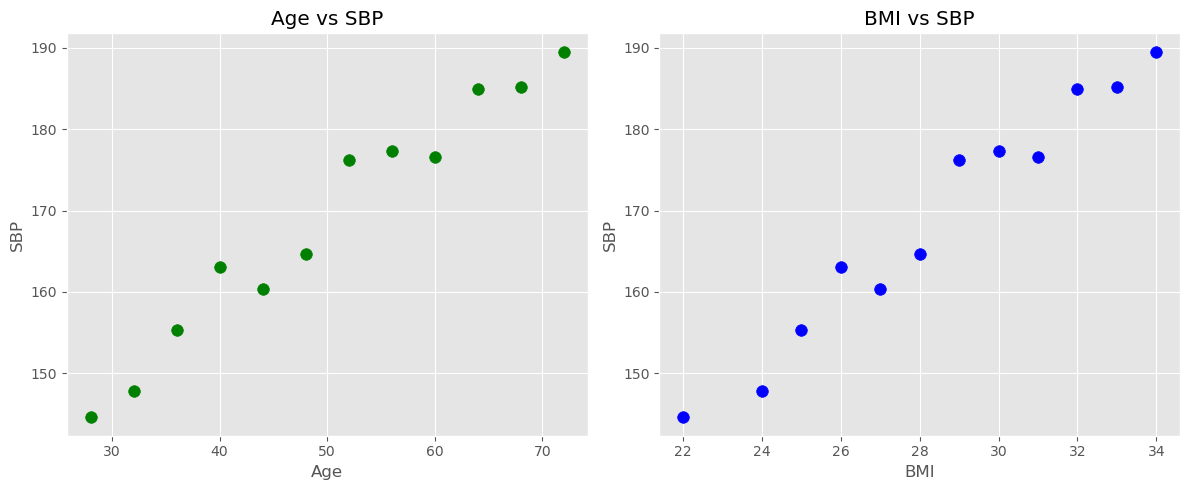

In [3]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(df["Age"], df["SBP"], s=70, c="g")
plt.xlabel("Age")
plt.ylabel("SBP")
plt.title("Age vs SBP")

plt.subplot(1,2,2)
plt.scatter(df["BMI"], df["SBP"], s=70, c="b")
plt.xlabel("BMI")
plt.ylabel("SBP")
plt.title("BMI vs SBP")

plt.tight_layout()
plt.show()

### What these plots are telling us?

- **Age vs SBP**  
  - Clear upward trend → as age increases, SBP increases.

- **BMI vs SBP**  
  - Also an upward pattern → higher BMI tends to relate to higher SBP.

This means:
- A linear model makes sense  
- Both predictors appear meaningful  
- No major outliers visible

## 3. Building the Multiple Regression Model

Predictors:
- `Age`
- `BMI`

Outcome:
- `SBP`

Again, we're gonna follow these steps:
1. Select predictors
2. Add intercept
3. Fit the model

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
X = df[["Age", "BMI"]]
X = sm.add_constant(X)
y = df["SBP"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     124.8
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           2.74e-07
Time:                        01:14:33   Log-Likelihood:                -28.864
No. Observations:                  12   AIC:                             63.73
Df Residuals:                       9   BIC:                             65.18
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.4963     57.019      1.394      0.197     -49.489     208.481
Age            0.3786      0.960      0.395      0.702      -1.792       2.549
BMI            2.4768      3.687      0.672      0.519      -5.865      10.818
==============================================================================
Omnibus:                        1.583   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.182
Skew:                           0.609   Prob(JB):                        0.554
Kurtosis:                       2.061   Cond. No.                     3.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1. Intercept (`const = 79.4963`, `p = 0.197`)

This is the predicted SBP when `Age = 0` and `BMI = 0`. As I already said before, this is not meaningful biologically, but it is required for the regression equation.

- Not statistically significant either as `p > 0.05`.


### 2. Age coefficient (`β₁ = 0.3786`, `p = 0.702`)

For every 1-year increase in age, SBP is expected to increase by `0.38 mmHg`, holding BMI constant. But:
* `p = 0.702`, which is not statistically significant.
* 95% CI includes negative values (`–1.79` to `2.55`).

Age does not appear to be an important predictor of SBP in this dataset.


### 3. BMI coefficient (`β₂ = 2.4768`, `p = 0.519`)

For every 1-unit increase in BMI, SBP is expected to increase by `2.48 mmHg`, holding age constant. But:
* `p = 0.519`, which is again not statistically significant.
* CI (`–5.87` to `10.82`) includes zero by a large margin.

BMI also is not a statistically significant predictor of SBP.


### 4. Model Fit: `R² = 0.965` (very high)

This means, Age + BMI together explain `96.5%` of the variation in SBP.

But a warning:
* Our sample size is extremely small (n = 12)
* Predictors not significant despite high R² basically suggests **overfitting** or **multicollinearity**.


### 5. `p-value` for overall model (F-test: `p = 2.74e-07`)

The overall model is significant, even though individual predictors are not. This can happen when:
* Predictors are correlated with each other (multicollinearity).
* Predictors jointly explain variation but no single one stands out.

## 4. Making Predictions

Let’s predict SBP for two hypothetical individuals:
1. Age 45, BMI 27  
2. Age 60, BMI 31

In [6]:
new_data = pd.DataFrame({
    "Age": [45, 60],
    "BMI": [27, 31]
})

new_data = sm.add_constant(new_data)
model.predict(new_data)

0    163.407030
1    178.993201
dtype: float64

### What the predictions mean?

We can see:
- For Age 45 & BMI 27 → ~163 mmHg
- For Age 60 & BMI 31 → ~179 mmHg

Actually, these predicted SBP values do not make clinical sense.😐

An SBP above `160 mmHg` for a 45-year-old with a BMI of `27` would typically be considered hypertensive, not a normal expectation. This suggests that the model’s predictions are not realistic, even though they are mathematically correct based on the data we used.

Our model is only reflecting the patterns in our small dataset, not real-world physiology. With such a limited sample size, the regression may produce inflated predictions, and neither Age nor BMI was statistically significant. Therefore, while we report the model’s predictions, we should also clearly state that:
- The estimates do not generalize to real populations
- The dataset is likely too small or unrepresentative
- The model appears overfitted
- Real-life SBP values at these ages are usually much lower

Multiple regression is powerful, but its accuracy depends on the quality and size of the data. Although the numerical results are not realistic due to the limitations of the dataset, the underlying logic of multiple linear regression is correct, and our example helps illustrate how MLR works in practice.😅